<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
medical_df = pd.read_csv('/content/drive/MyDrive/Data/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


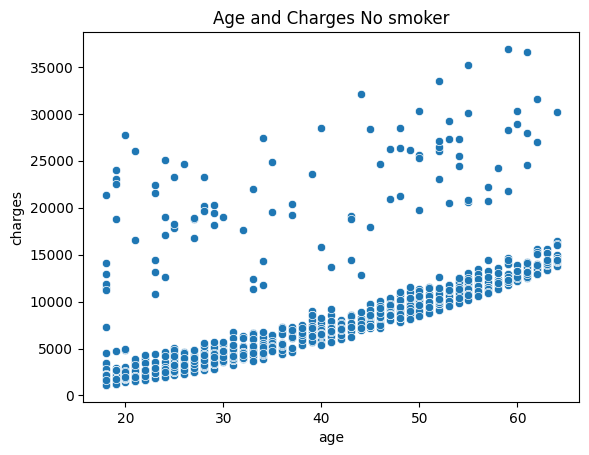

In [4]:
plt.title("Age and Charges No smoker")
fig = sns.scatterplot(x=non_smoker_df['age'], y=non_smoker_df['charges'])


In [5]:
non_smoker_df['age'], non_smoker_df['charges']

(1       18
 2       28
 3       33
 4       32
 5       31
         ..
 1332    52
 1333    50
 1334    18
 1335    18
 1336    21
 Name: age, Length: 1064, dtype: int64,
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

- На графіку видно лінійність даних



In [6]:
x = non_smoker_df['age']
y = non_smoker_df['charges']

In [7]:
x, y

(1       18
 2       28
 3       33
 4       32
 5       31
         ..
 1332    52
 1333    50
 1334    18
 1335    18
 1336    21
 Name: age, Length: 1064, dtype: int64,
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

- Перетворюємо DataFrame у numpy-array

In [8]:
age = non_smoker_df['age'].values
charges = non_smoker_df['charges'].values
age[:3], charges[:3]

(array([18, 28, 33]), array([ 1725.5523 ,  4449.462  , 21984.47061]))

або

In [9]:
age = non_smoker_df['age'].to_numpy()
charges = non_smoker_df['charges'].to_numpy()
age[:3], charges[:3]

(array([18, 28, 33]), array([ 1725.5523 ,  4449.462  , 21984.47061]))

**МНК**

In [10]:
def normal_equations(X, y):
  theta = np.linalg.inv(X.T. dot(X)).dot(X.T).dot(y)
  return theta

- Додаємо intercept (дзайн-матрицю)

перший стовпець у X має складатися з одиниць (щоб врахувати
𝜃
0)


In [11]:
X_with_intercept = np.c_[np.ones((age.shape[0], 1)), age]
age[:3], X_with_intercept[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

або

In [12]:
X_with_intercept_2 = np.column_stack((np.ones(len(age)), age))
age[:3], X_with_intercept_2[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [13]:
y = charges
y

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [14]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [15]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [16]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [17]:
import matplotlib.pyplot as plt

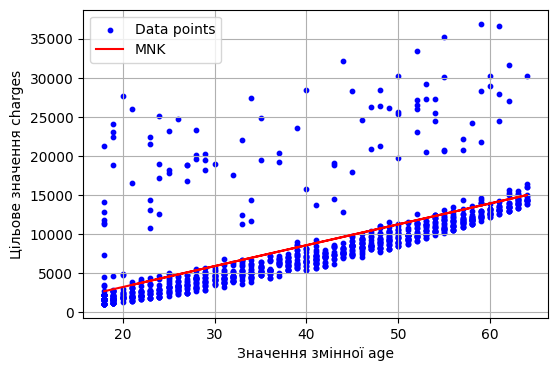

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(age, y, color='blue', s=10, label='Data points')
plt.plot(age, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної age')
plt.ylabel('Цільове значення charges')
plt.legend()
plt.grid(True)
plt.show()

**Точність прогнозу RMSE**

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions_MNK)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions_MNK) #вивела щоб ще подивитися на цей результат

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Error: {r2:.2f}")

Root Mean Squared Error: 4662.51
R2 Error: 0.39


In [20]:
np.mean(y), np.std(y), np.min(y)

(8434.268297856204, 5990.9645302876115, 1121.8739)

Помлка менше ніж стандартне відхилення, що вже є хорошим знаком але R2 досить низьке як для моделі

Подивимося на залишки

In [74]:
errors = y - predictions_MNK

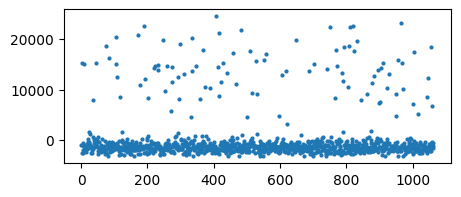

In [22]:

plt.figure(figsize=(5, 2))
fig = plt.plot(errors, "o",markersize=2)



Залишки гомоскедастичні, що є гарною ознакою

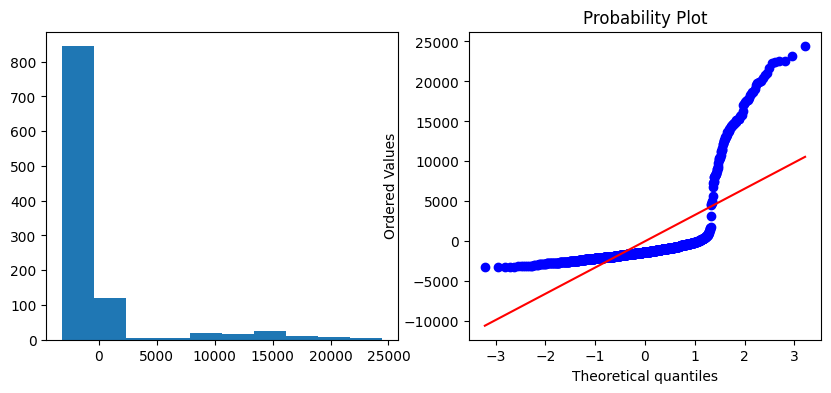

In [75]:
from scipy.stats import probplot

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

Бачимо що розподіл помилок не нормальний, що вказує на проблеми з моделью

Думає є сенс перевірити на викиди x, y колонки, щоб зрозуміти чи могло це вплинути на модель використовуючи метод  МНК і особливо RMSE

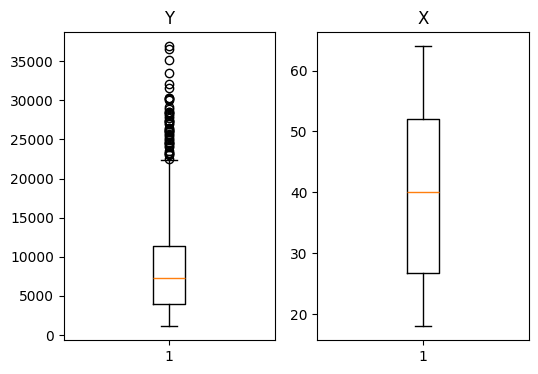

In [24]:
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
plt.title("Y")
fig1= plt.boxplot(x=non_smoker_df['charges'])

plt.subplot(1,2,2)
plt.title("X")
fig2= plt.boxplot(x=non_smoker_df['age'])

Бачимо викиди, можу припустити що це повпливало на модель в гіршу сторону

**Full-Batch градієнтного спуску з numpy**

 Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.

- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE

Визначаємо вхідні дані

In [25]:

X = non_smoker_df['age'].values # 1D
x = non_smoker_df['age'].values.reshape(-1, 1) # 2D

y = non_smoker_df['charges'].values
X.shape,  x.shape,

((1064,), (1064, 1))

In [26]:
x[:,0], x

(array([18, 28, 33, ..., 18, 18, 21]),
 array([[18],
        [28],
        [33],
        ...,
        [18],
        [18],
        [21]]))

**Градієнтний спуск**

In [27]:

def full_batch_gradient_descent(x, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * x[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, x[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

# m, b, errors = full_batch_gradient_descent(x, y, lr=0.0006, epochs=1000)
# predictions_fbgd_1 = m * x[:, 0] + b

# m, b

Використовуємо різний learning rate

In [28]:
m_1, b_1, errors_1 = full_batch_gradient_descent(x, y, lr=0.0006, epochs=1000)
predictions_fbgd_1 = m_1 * x[:, 0] + b_1

m_1, b_1

(-7.120886964480536e+43, -1.6033094948237805e+42)

In [ ]:
errors_1

In [30]:
m_2, b_2, errors_2 = full_batch_gradient_descent(x, y, lr=0.00001, epochs=1000)
predictions_fbgd_2 = m_2 * x[:, 0] + b_2

m_2, b_2

(220.15455551129122, 0.21300652799863293)

In [31]:
m_3, b_3, errors_3 = full_batch_gradient_descent(x, y, lr=0.000001, epochs=1000)
predictions_fbgd_3 = m_3 * x[:, 0] + b_3

m_3, b_3

(213.4575690658104, 4.33124916239435)

Перевіряємо RMSE моделі

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y, predictions_fbgd):
  mse = mean_squared_error(y, predictions_fbgd)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, predictions_fbgd) #вивела щоб ще подивитися на цей результат

  print(f"Root Mean Squared Error: {rmse:.2f}")
  print(f"R2 Error: {r2:.2f}")

  return rmse, r2

In [33]:
# rmse_val, r2_val = rmse(y, predictions_fbgd_1)

In [34]:
result_1 = rmse(y, predictions_fbgd_1)

Root Mean Squared Error: 2979846570834788966414624109640699531359158272.00
R2 Error: -247396932170892862900409218999659443686709468808662569019163605850906658422585819136.00


In [35]:
result_2 = rmse(y, predictions_fbgd_2)

Root Mean Squared Error: 4715.35
R2 Error: 0.38


In [36]:
result_3 = rmse(y, predictions_fbgd_3)

Root Mean Squared Error: 4723.65
R2 Error: 0.38


In [37]:
np.mean(y), np.std(y), np.min(y)

(8434.268297856204, 5990.9645302876115, 1121.8739)

**Графік помилки в залежності від ітерації**

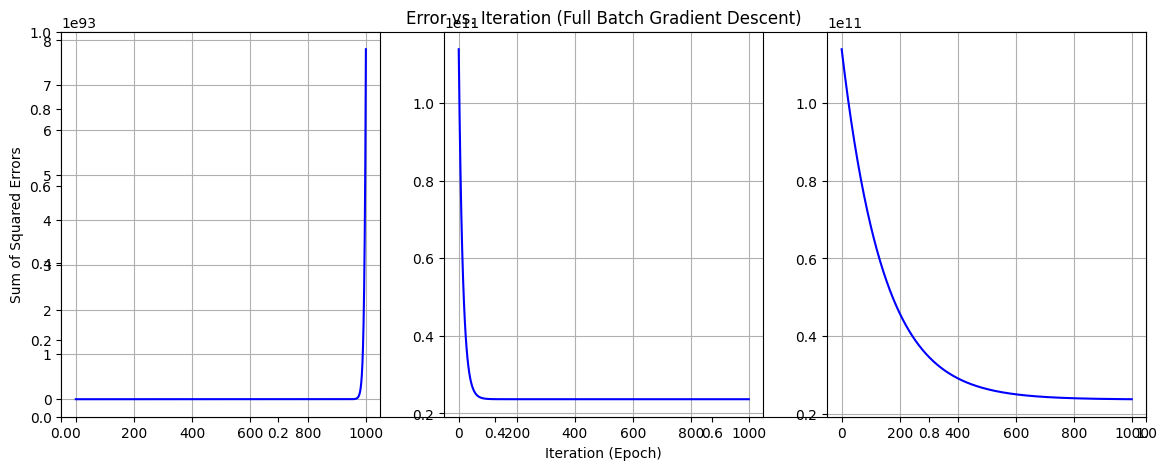

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.title("Error vs. Iteration (Full Batch Gradient Descent)")

plt.xlabel("Iteration (Epoch)")
plt.ylabel("Sum of Squared Errors")


plt.subplot(1,3,1)
plt.plot(errors_1,  color='blue', markersize=3)
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(errors_2,  color='blue', markersize=3)
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(errors_3,  color='blue', markersize=3)
plt.grid(True)

plt.show()

**Висновок**

Звертаючи увагу на
*Root Mean Squared Error*: 4715.35, *стандартне відхилення* : 5990.964 то найкращий результат дав *learning rate* : 0.00001

**scikit-learn.LinearRegression.**




Тут зверніть увагу, що вхід X має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись X.to_frame() щоб конвертувати колонку в датафрейм.

- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE

In [39]:
!pip install scikit-learn --quiet

In [72]:
x.shape


(1064, 1)

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [53]:
lin_reg.fit(x,y)

LinearRegression()

In [54]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [55]:
predictions_sklearn = lin_reg.predict(x)

In [76]:
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

точність прогнозу RMSE

In [73]:
rmse_sklearn = rmse(y, predictions_sklearn )
rmse_sklearn

Root Mean Squared Error: 4662.51
R2 Error: 0.39


(4662.505766636395, 0.3943171632425906)

Графік на якому дані *age* проти *charges* в вигляді діаграми розсіювання і всі **три лінії регресії**, знайдені кожним з методів

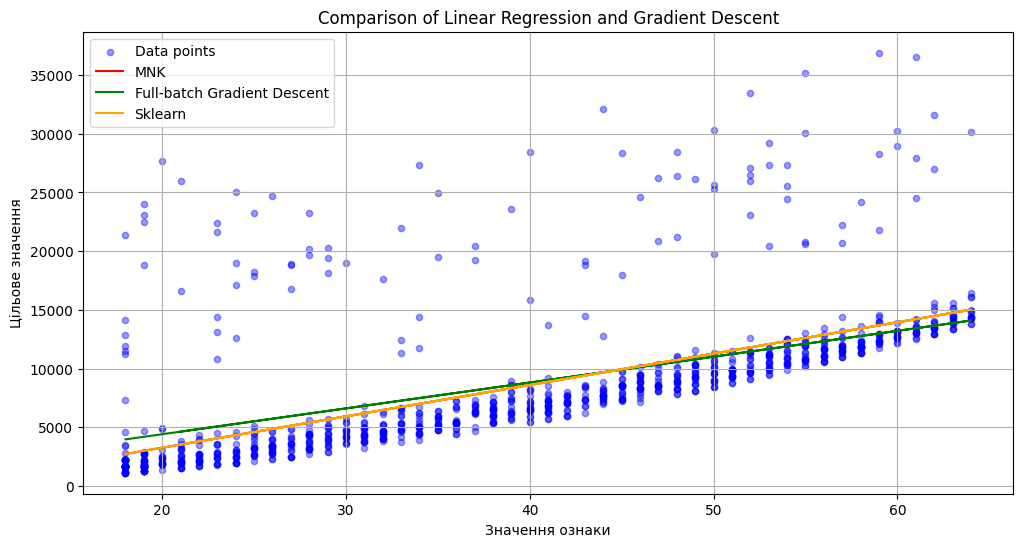

In [71]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue',s=20, alpha=0.4, label='Data points')
plt.plot(x, predictions_MNK, color='red', label='MNK')
plt.plot(x, predictions_fbgd_2, color='green', label='Full-batch Gradient Descent')
plt.plot(x, predictions_sklearn, color='orange', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Як **висновок**, помітна різниця між методами **FBGD** та **МНК вручну/Sklearn**

**МНК вручну/Sklearn** - надає однакові коефіцієнти і вважаю що в цьому випадку надає більш точну картину прогнозування моделі орієнтуючись на візульне відображення та RMSE/R2

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [79]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
smoker_df = medical_df[medical_df.smoker == "yes"]

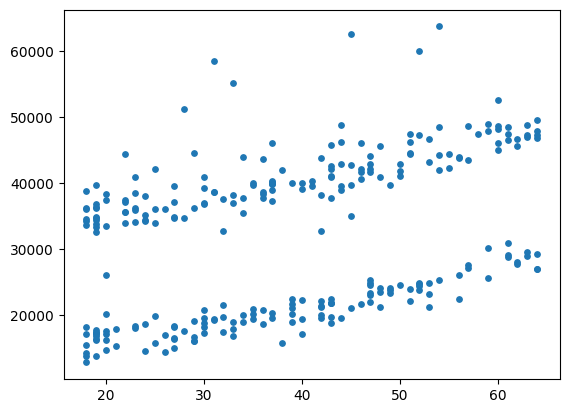

In [118]:
fig = plt.scatter(smoker_df.age, smoker_df.charges, s = 15)

In [114]:
smoker_df[:3]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577


In [105]:
X = smoker_df[["age"]]
X.shape

(274, 1)

In [106]:
y = smoker_df["charges"].to_numpy()
y.shape

(274,)

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [108]:
lin_reg.fit(X,y)

LinearRegression()

In [111]:
predictions_sklearn_smoke = lin_reg.predict(X)
predictions_sklearn_smoke[:3]

array([26093.642567  , 39218.85945773, 28535.54338388])

In [112]:
rmse_sklearn_smoke = rmse(y, predictions_sklearn_smoke)

Root Mean Squared Error: 10711.00
R2 Error: 0.14


In [116]:
np.mean(y), np.std(y), np.min(y)

(32050.23183153284, 11520.46670652943, 12829.4551)

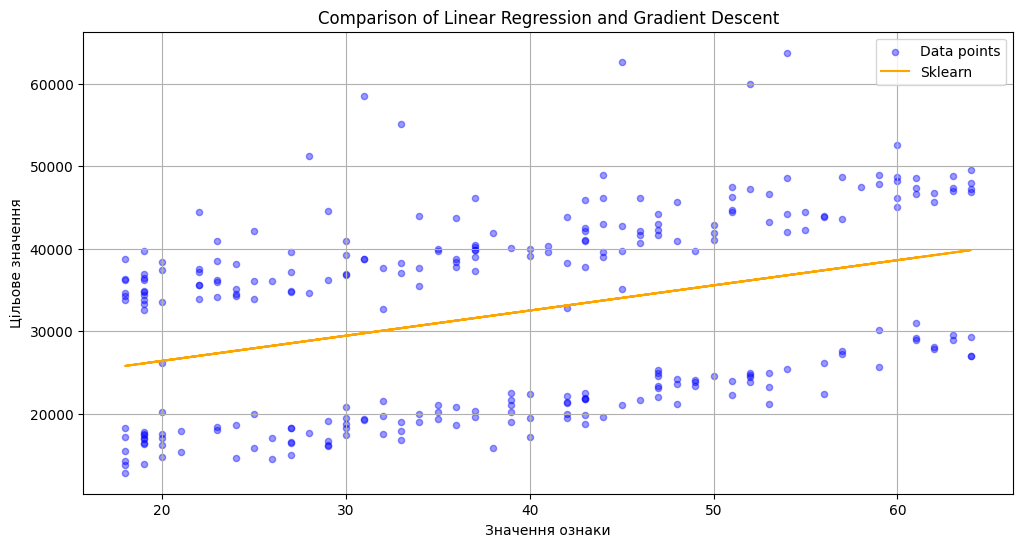

In [113]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue',s=20, alpha=0.4, label='Data points')
plt.plot(X, predictions_sklearn_smoke, color='orange', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Висновок**
Дивлячись на візуалізацію та оцінки точності моделі можна сказати, що ця модель не є ефективною, і це в більшості пов язано з тим, що дані хоч і лінійні але діляться на дві лінії і помилка моделі дуже велика:

Root Mean Squared Error: 10711.00  стандартне відхилення : 11520.46

R2 Error: 0.14


 тому я б не використовувала її для прогнозування
